# demonstration of the power transform on data with a skew

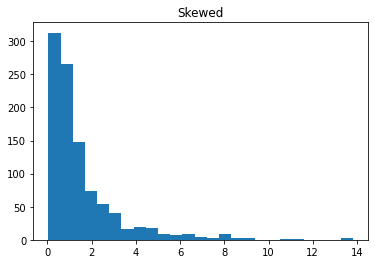

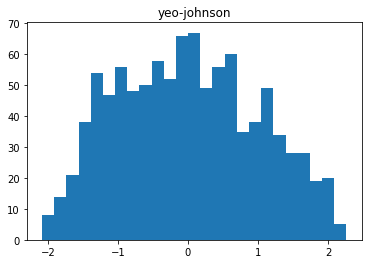

In [1]:
from numpy import exp
from numpy.random import randn
from sklearn.preprocessing import PowerTransformer
import matplotlib.pyplot as plt

# generate gaussian data sample
data = randn(1000)

# add a skew to the data distribution
data = exp(data)

# histogram of the raw data with a skew
plt.hist(data, bins=25)
plt.title("Skewed")
plt.show()

# reshape data to have rows and columns
data = data.reshape((len(data),1))

# power transform the raw data
power = PowerTransformer(method='yeo-johnson', standardize=True)
data_trans = power.fit_transform(data)

# histogram of the transformed data
plt.hist(data_trans, bins=25)
plt.title("yeo-johnson")
plt.show()

# load and summarize the sonar dataset

In [2]:
from pandas import read_csv
# load dataset
dataset = read_csv('../datasets/sonar.csv', header=None)

# summarize the shape of the dataset
print(dataset.shape)

# summarize each variable
print(dataset.describe())

(208, 61)
               0           1           2           3           4           5   \
count  208.000000  208.000000  208.000000  208.000000  208.000000  208.000000   
mean     0.029164    0.038437    0.043832    0.053892    0.075202    0.104570   
std      0.022991    0.032960    0.038428    0.046528    0.055552    0.059105   
min      0.001500    0.000600    0.001500    0.005800    0.006700    0.010200   
25%      0.013350    0.016450    0.018950    0.024375    0.038050    0.067025   
50%      0.022800    0.030800    0.034300    0.044050    0.062500    0.092150   
75%      0.035550    0.047950    0.057950    0.064500    0.100275    0.134125   
max      0.137100    0.233900    0.305900    0.426400    0.401000    0.382300   

               6           7           8           9   ...          50  \
count  208.000000  208.000000  208.000000  208.000000  ...  208.000000   
mean     0.121747    0.134799    0.178003    0.208259  ...    0.016069   
std      0.061788    0.085152    0.118

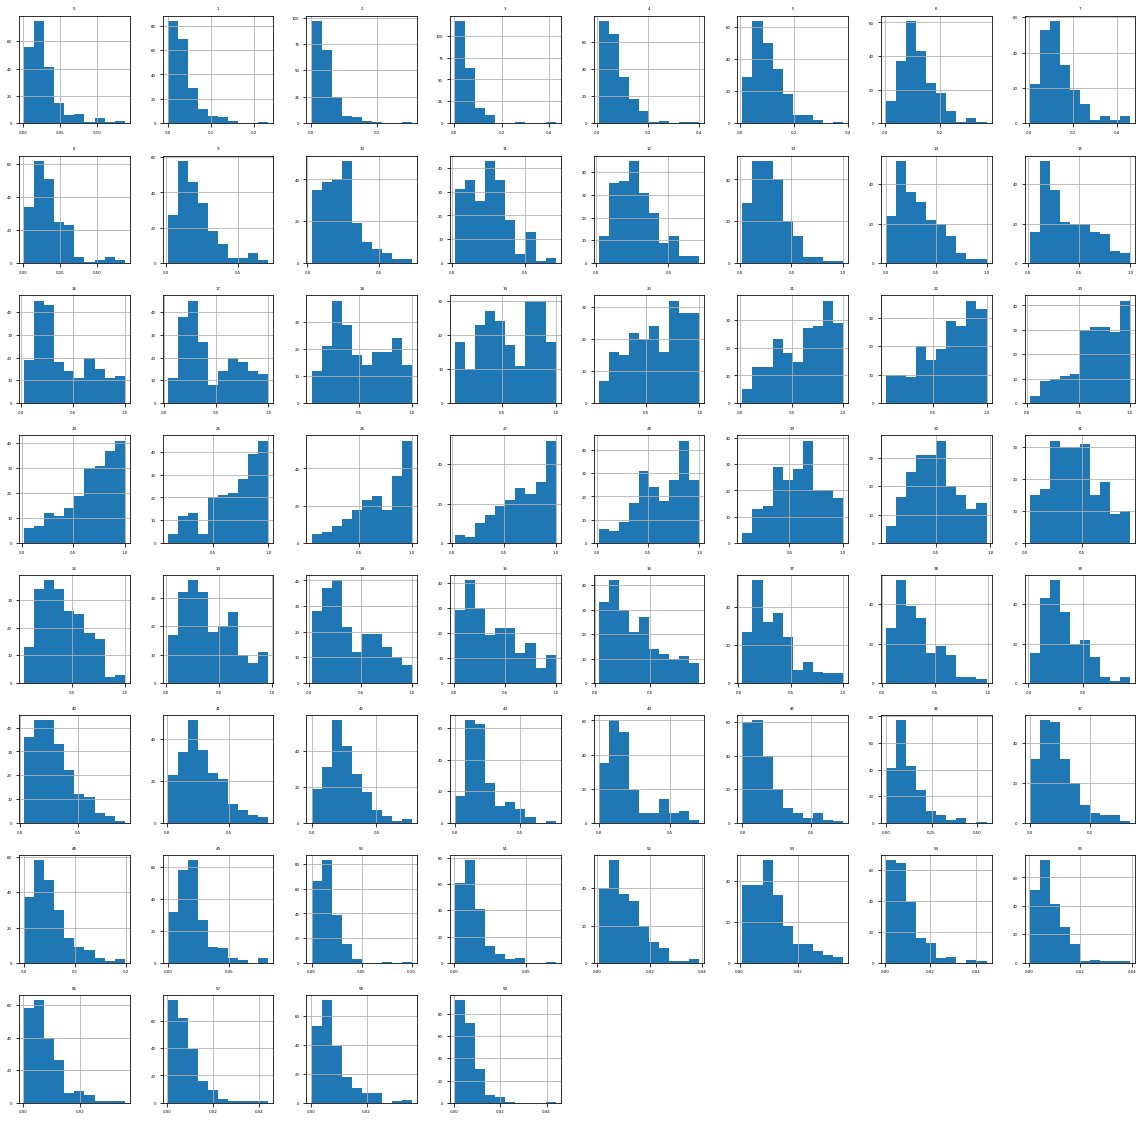

In [3]:
# histograms of the variables
fig = dataset.hist(xlabelsize=4, ylabelsize=4, figsize=(20,20))
[x.title.set_size(4) for x in fig.ravel()]
plt.show()

# evaluate knn on the raw sonar dataset

In [4]:
from numpy import mean
from numpy import std
from pandas import read_csv
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder

# load dataset
dataset = read_csv('../datasets/sonar.csv', header=None)
data = dataset.values

# separate into input and output columns
X, y = data[:, :-1], data[:, -1]

# ensure inputs are floats and output is an integer label
X = X.astype('float32')
y = LabelEncoder().fit_transform(y.astype('str'))

# define and configure the model
model = KNeighborsClassifier()

# evaluate the model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)

print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.797 (0.073)


In [5]:
# visualize a box-cox transform of the sonar dataset
from pandas import read_csv
from pandas import DataFrame
from sklearn.preprocessing import PowerTransformer
from matplotlib import pyplot

# Load dataset
dataset = read_csv('../datasets/sonar.csv', header=None)

# retrieve just the numeric input values
data = dataset.values[:, :-1]

# perform a box-cox transform of the dataset
pt = PowerTransformer(method='box-cox')

# NOTE: we expect this to cause an error!!!
data = pt.fit_transform(data)

# convert the array back to a dataframe
dataset = DataFrame(data)

# histograms of the variables
fig = dataset.hist(xlabelsize=4, ylabelsize=4, figsize=(20,20))
[x.title.set_size(4) for x in fig.ravel()]
# show the plot
pyplot.show()

ValueError: The Box-Cox transformation can only be applied to strictly positive data

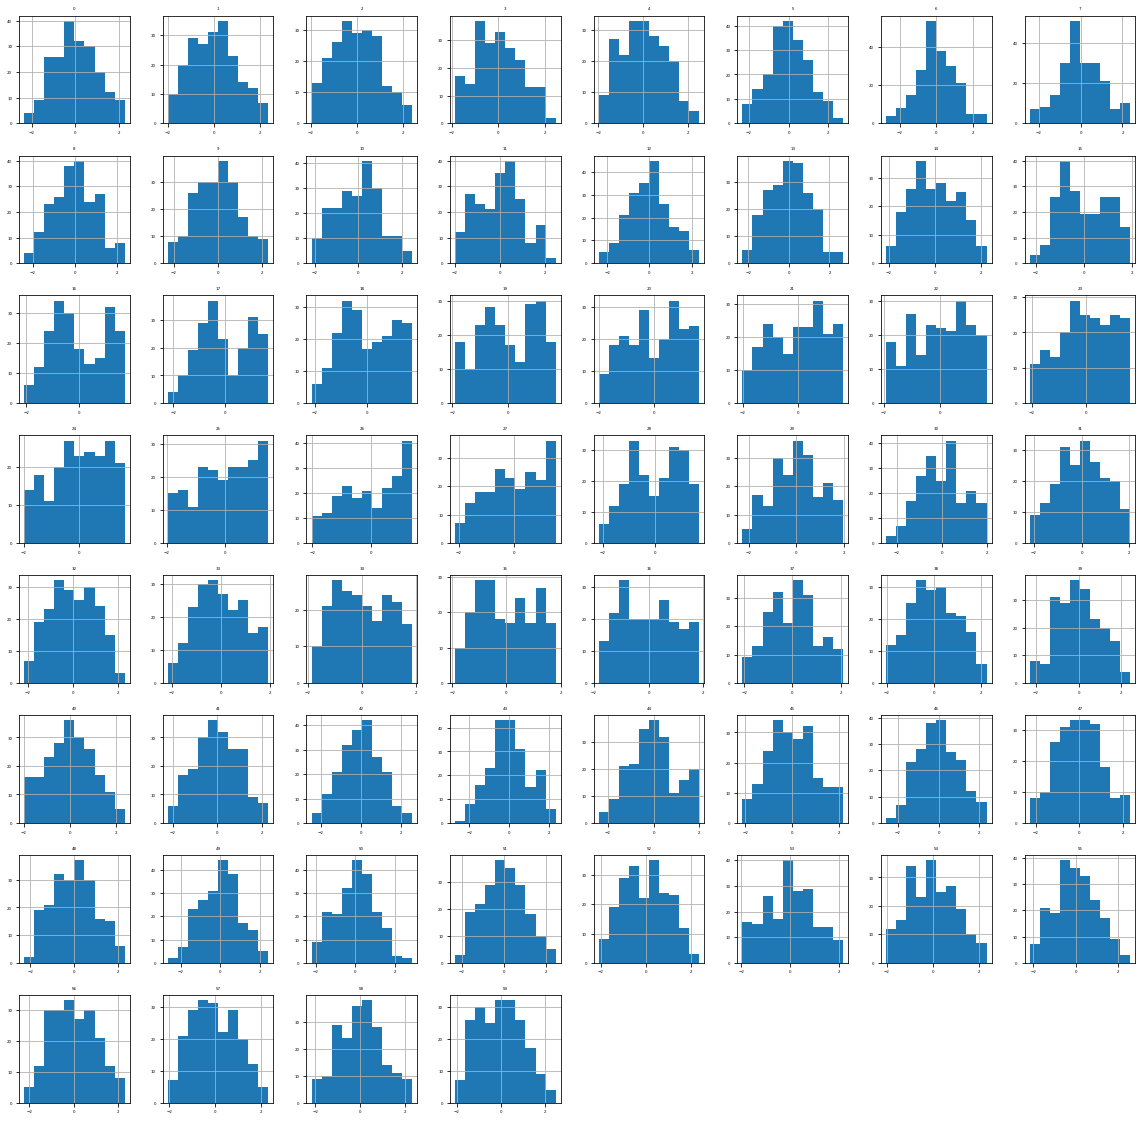

In [6]:
# visualize a box-cox transform of the scaled sonar dataset
from pandas import read_csv
from pandas import DataFrame
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline

# Load dataset
dataset = read_csv('../datasets/sonar.csv', header=None)

# retrieve just the numeric input values
data = dataset.values[:, :-1]

# perform a box-cox transform of the dataset
scaler = MinMaxScaler(feature_range=(1, 2))
power = PowerTransformer(method='box-cox')
pipeline = Pipeline(steps=[('s', scaler),
                           ('p', power)])
data = pipeline.fit_transform(data)

# convert the array back to a dataframe
dataset = DataFrame(data)
fig = dataset.hist(xlabelsize=4, ylabelsize=4, figsize=(20,20))
[x.title.set_size(4) for x in fig.ravel()]
plt.show()

# evaluate knn on the box-cox sonar dataset

In [7]:
from numpy import mean
from numpy import std
from pandas import read_csv
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline

# load dataset
dataset = read_csv('../datasets/sonar.csv', header=None)
data = dataset.values

# separate into input and output columns
X, y = data[:, :-1], data[:, -1]

# ensure inputs are floats and output is an integer label
X = X.astype('float32')
y = LabelEncoder().fit_transform(y.astype('str'))

# define the pipeline
scaler = MinMaxScaler(feature_range=(1, 2))
power = PowerTransformer(method='box-cox')
model = KNeighborsClassifier()
pipeline = Pipeline(steps=[('s', scaler),('p', power), ('m', model)])

# evaluate the pipeline
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1)

# report pipeline performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.811 (0.085)


# visualize a yeo-johnson transform of the sonar dataset

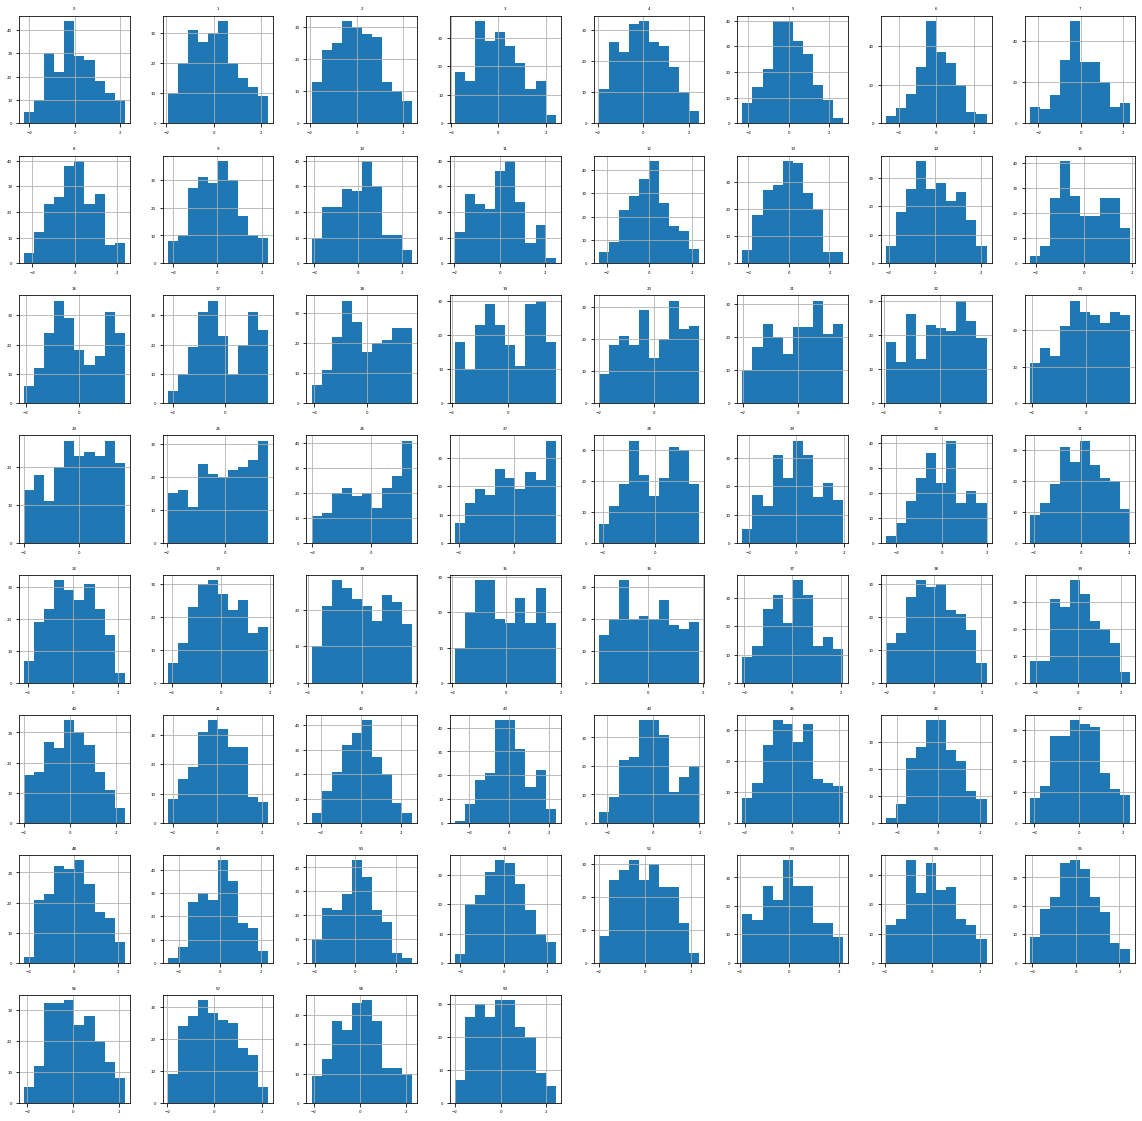

In [8]:
from pandas import read_csv
from pandas import DataFrame
from sklearn.preprocessing import PowerTransformer

# Load dataset
dataset = read_csv('../datasets/sonar.csv', header=None)

# retrieve just the numeric input values
data = dataset.values[:, :-1]

# perform a yeo-johnson transform of the dataset
pt = PowerTransformer(method='yeo-johnson')
data = pt.fit_transform(data)

# convert the array back to a dataframe
dataset = DataFrame(data)

# histograms of the variables
fig = dataset.hist(xlabelsize=4, ylabelsize=4, figsize=(20,20))
[x.title.set_size(4) for x in fig.ravel()]
plt.show()

In [9]:
# evaluate knn on the yeo-johnson sonar dataset
from numpy import mean
from numpy import std
from pandas import read_csv
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import PowerTransformer
from sklearn.pipeline import Pipeline

# load dataset
dataset = read_csv('../datasets/sonar.csv', header=None)
data = dataset.values

# separate into input and output columns
X, y = data[:, :-1], data[:, -1]

# ensure inputs are floats and output is an integer label
X = X.astype('float32')
y = LabelEncoder().fit_transform(y.astype('str'))

# define the pipeline
power = PowerTransformer(method='yeo-johnson')
model = KNeighborsClassifier()
pipeline = Pipeline(steps=[('p', power), ('m', model)])

# evaluate the pipeline
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1)

# report pipeline performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.808 (0.082)


# evaluate knn on the yeo-johnson standardized sonar dataset

In [10]:
from numpy import mean
from numpy import std
from pandas import read_csv
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# load dataset
dataset = read_csv('../datasets/sonar.csv', header=None)
data = dataset.values

# separate into input and output columns
X, y = data[:, :-1], data[:, -1]

# ensure inputs are floats and output is an integer label
X = X.astype('float32')
y = LabelEncoder().fit_transform(y.astype('str'))

# define the pipeline
scaler = StandardScaler()
power = PowerTransformer(method='yeo-johnson')
model = KNeighborsClassifier()
pipeline = Pipeline(steps=[('s', scaler), ('p', power), ('m', model)])

# evaluate the pipeline
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1)

# report pipeline performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.816 (0.077)
